In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-diseae/heart-disease.csv


#  Data Collection

In [2]:
data = pd.read_csv('/kaggle/input/heart-diseae/heart-disease.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


All are numerical data and it is a classification model. I am considering 'target' as my predictable variable.
1. cp - in 4 levels of pain
2. slope - ?
3. ca - ?
4. thal - ?

In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Don't see much changes in data processing. Continuing ahead with EDA

# EDA

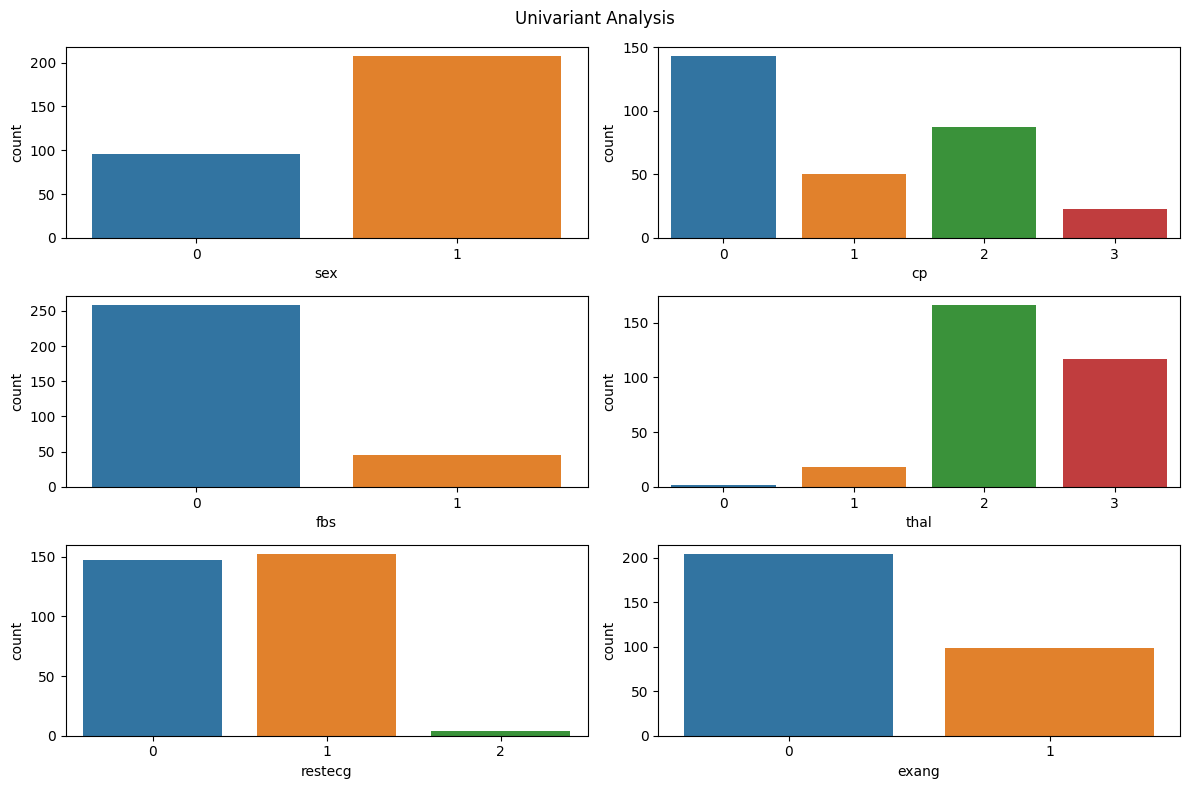

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['sex', 'cp', 'fbs', 'thal', 'restecg', 'exang']

# Determine the number of columns
num_cols = 2
num_rows = (len(cols) + num_cols - 1) // num_cols  # Calculate the number of rows needed

plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
plt.suptitle("Univariant Analysis")
for index, col in enumerate(cols):
    plt.subplot(num_rows, num_cols, index + 1)  # Create a subplot in the grid
    sns.countplot(x=col, data=data)
    plt.tight_layout()

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

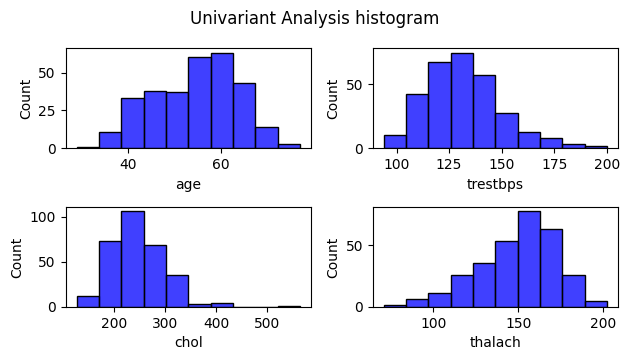

In [28]:
cols = ['age','trestbps','chol','thalach']
plt.suptitle("Univariant Analysis histogram")
for index, col in enumerate(cols):
    plt.subplot(num_rows, num_cols, index + 1)  # Create a subplot in the grid
    sns.histplot(x=data[col],bins=10, kde=False, color='blue')
    plt.tight_layout()

plt.show()

<Axes: xlabel='age', ylabel='thalach'>

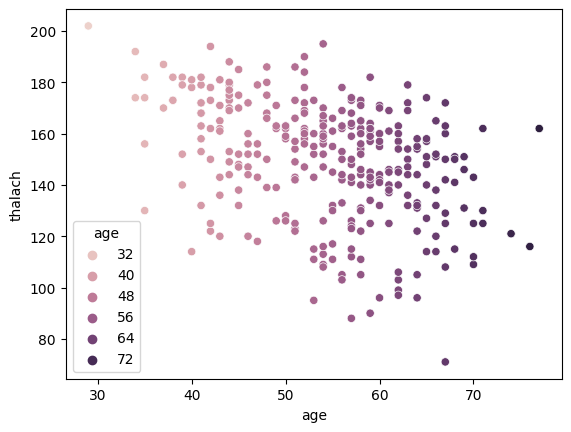

In [32]:
sns.scatterplot(data=data,x=data['age'],y=data['thalach'],hue=data['age'])

<Axes: xlabel='target', ylabel='age'>

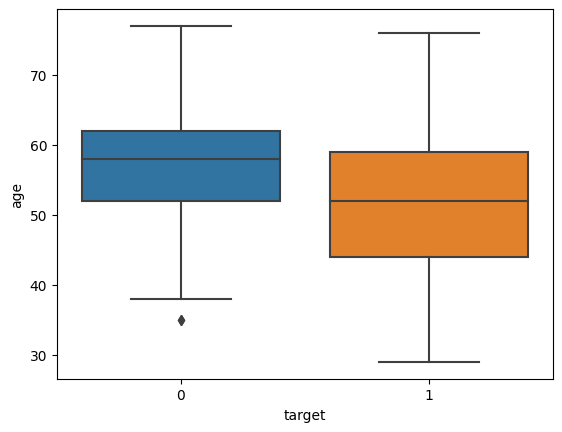

In [34]:
sns.boxplot(data=data,x=data['target'],y=data['age'])

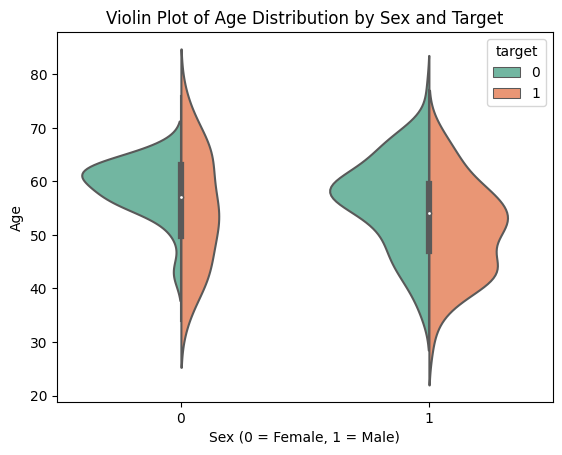

In [36]:
sns.violinplot(x='sex', y='age', hue='target', data=data, split=True, palette='Set2')
plt.title('Violin Plot of Age Distribution by Sex and Target')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Age')
plt.show()

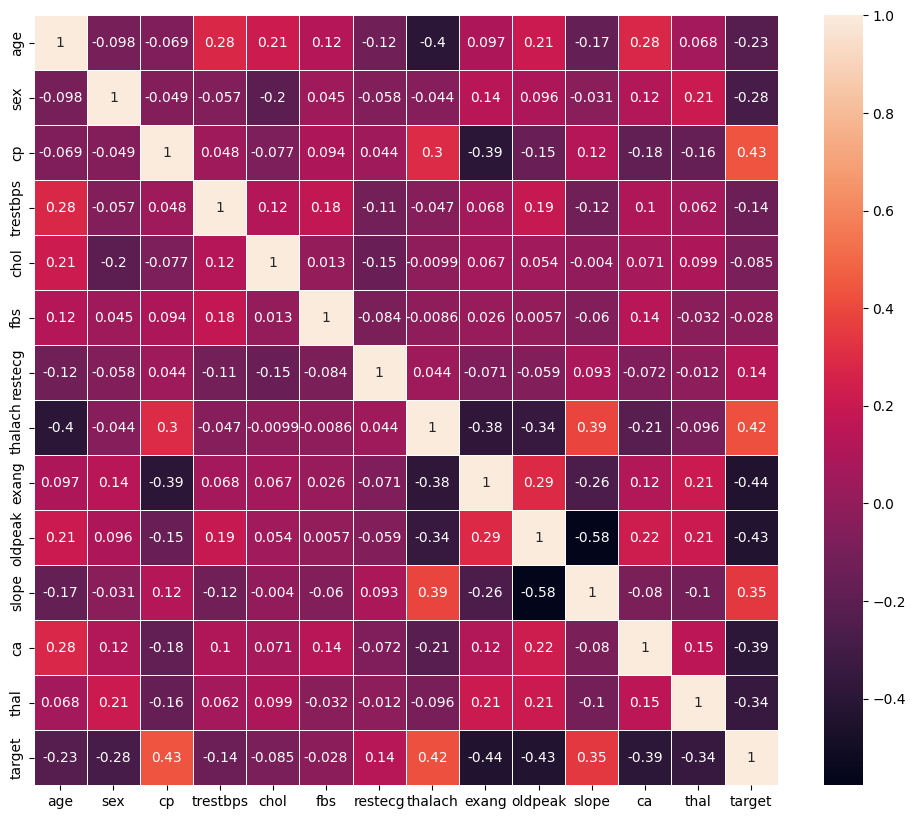

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,linewidth=0.5)
plt.show()

# Data Preprocessing

Normalising in datapreprocessing

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x = data.drop('target',axis=1)
y = data['target']
x_train, y_train, x_test, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
ss = StandardScaler()
ss.fit_transform()